# Ising Model

#### Theory

The Ising model plays a central role in the theory of phase transitions. It is a mathematical model of ferromagnetism, and in particular it models the effect of temperature and external field on the magnetization. The Ising model is named after Ernst Ising. He first solved the one-dimensional (1D) Ising model exactly and found that it did not show phase transition. It was later proved that for the 2D and 3D cases, the Ising model does show phase transition. In this experiment you will use Monte Carlo simulations to study second order phase transitions by solving the 2D Ising model without external field.

The model consists of a 2D square lattice of spins. Each of these spins can be +1 or -1. In its simplest form (what we will do in this lab), the interaction between spins is only between nearest neighbor spins. The energy of the system (also called Hamiltonian) is give by:
$$
\mathcal{E} = -J \sum_{\langle i j \rangle} S_{i} S_{j}.
$$
where the sum is over all pairs of nearest neighbor $\langle i j \rangle$ and $J$ is known as the coupling constant and here we will assume is positive. The system undergoes a second order phase transition at the critical temperature $T_{c}$. For temperatures less than $T_{c}$, the system magnetizes, and the state is called ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than $T_{c}$, the system is in the disordered or paramagnetic state. In this case, there are no long-range correlations between the spins.

The order parameter for this system is the average magnetization. 
$$
m = \frac{1}{N} \sum_i S_i
$$
The order parameter distinguishes the two phases realized by the systems. It is zero in the disordered state, while non-zero in the ordered, ferromagnetic, state. Other important properties of the system are the energy ($\mathcal{E}$), Specific Heat and the Susceptibility. Notice that these quantities are normally reported as intensive prooerties (that is, the quantity per number of spin).

#### Tasks

- Write a Monte Carlo code to solve the 2D Ising model (without external field) and using periodic boundary conditions. In reference [1] you will find a detailed explanation of the Ising model and how to use the Montecarlo method to solve it.
- Report curves of the Magnetization, Energy, Specific Heat and the Susceptibility. Compare and discuss your results to the analytical solutions.
- Study the effect of the system size on the results. Simulate at least 3 systems sizes.
- The method section of your report should include an explanation of how your code works. It should also should mention and explain the values that you used for all the parameters of the model. 
- **Important**: the results section should contain a detailed analysis and description of your graphs and results, and all graphs must be reference in the text. You will get low marks if you only present graphs with no explanation or analysis.
- Calculating uncertainty due to the numerical method is out of the scope of this experiment.

#### References

- [1] Computational Physics, Nicholas J. Giordano, Chapter 7, 1st Edition, 1997, Prentice Hall.

#### Resources

- [1] https://rajeshrinet.github.io/blog/2014/ising-model/
- [2] https://www.physics.purdue.edu/~hisao/book/

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def start_spins(L, pos_prop):
    coords = np.meshgrid(range(L), range(L))
    spin_list = np.random.rand(L * L) 
    spin_list = np.where(spin_list < pos_prop, 1, -1)
    spin_list = spin_list.reshape(L,L)
    return coords, spin_list



In [64]:
def get_hamiltonian(spin_list):
    l = len(spin_list)
    

In [65]:
def simulate_ising(T, L, n_step, pos_prop=0.5):
    coords, spin_list = start_spins(L, pos_prop)
    
    for row, vals in enumerate(spin_list):
        for col, spin in enumerate(vals):
            pass

In [66]:
simulate_ising(30, 1000, n_step=10)

In [67]:
coords, spin_list = start_spins(10, 0.5)

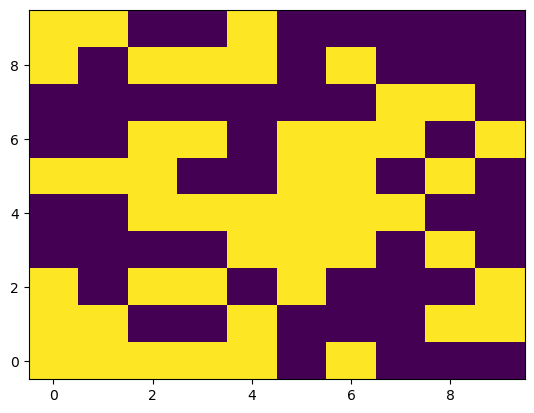

In [68]:
plt.pcolormesh(coords[0], coords[1], spin_list, cmap="viridis")
plt.show()

In [69]:
len(spin_list)

10

In [70]:
spin_list

array([[ 1,  1,  1,  1,  1, -1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1, -1, -1, -1,  1,  1],
       [ 1, -1,  1,  1, -1,  1, -1, -1, -1,  1],
       [-1, -1, -1, -1,  1,  1,  1, -1,  1, -1],
       [-1, -1,  1,  1,  1,  1,  1,  1, -1, -1],
       [ 1,  1,  1, -1, -1,  1,  1, -1,  1, -1],
       [-1, -1,  1,  1, -1,  1,  1,  1, -1,  1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1, -1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1, -1, -1, -1, -1, -1]])

In [71]:
spin_list[0]

array([ 1,  1,  1,  1,  1, -1,  1, -1, -1, -1])

In [75]:
spin_list[-1]

array([ 1,  1, -1, -1,  1, -1, -1, -1, -1, -1])